### Tenseflow Image-Recognition

It is based on training a neural network model to classify images of clothing.

In [1]:
import tensorflow as tf
from tensorflow import keras
# High-level API provided by tf

import numpy as np
import matplotlib.pyplot as plt
# import _tkinter
# matplotlib.use('TKAgg',warn=False, force=True)


In [2]:
data = keras.datasets.fashion_mnist

(train_img, train_labels), (test_img, test_labels)=data.load_data()

In [3]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
 'Coat', 'Sandal', 'skirt', 'Sneaker', 'Bag', 'Ankle boot']		
# list of labels being encoded to 0-9


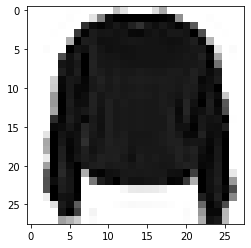

In [5]:
plt.imshow(train_img[7], cmap=plt.cm.binary)
plt.show()

In [7]:
print(train_img[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

Scaling values so that values remains in the range of 0 to 255 to be feeded into the model.

In [9]:
train_img =train_img/255.0
test_img = test_img/255.0
print(train_img[7])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.53787005e-05 1.53787005e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.68858131e-04
  4.30603614e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.07497116e-04 1.30718954e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.07574010e-05 0.00000000e+00 0.00000000e+00
  4.30603614e-04 1.93771626e-03 3.70626682e-03 3.92156863e-03
  3.92156863e-03 3.92156863e-03 3.92156863e-03 3.92156863e-03
  3.92156863e-03 3.87543253e-03 3.81391772e-03 1.70703576e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.07574010e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.07574010e-05 0.00000000e+00 0.00000000e+00 3.16801230e-03
  3.75

- The first layer in this network, **tf.keras.layers.Flatten**, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
- the network consists of a sequence of two **tf.keras.layers.Dense** layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons).
- The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [4]:
# Creating a model 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Input Layer
    keras.layers.Dense(128, activation="relu"), #Hidden Layer, Dense for fully connected-Layer
#     relu is for rectified linear unit, as discussed before..
    keras.layers.Dense(10, activation="softmax") 
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [5]:
# Compiling and training the model with data-sets

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_img, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 3.6676 - acc: 0.6781
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.7407 - acc: 0.7246
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.6217 - acc: 0.7705
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5534 - acc: 0.8067
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5285 - acc: 0.8206


In [6]:
# Testing and evaluating the model

test_loss, test_acc = model.evaluate(test_img, test_labels)

print(test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.5626 - acc: 0.8128
0.8128


### Making Predictions

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [17]:
# probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# This is not required because in actual model creation actiavtion function of Softmax had already been used.

In [19]:
prediction = model.predict(test_img)
# It should be in the form of list, where we are getting the set of values..

# print(prediction)
print(prediction[0])
print(np.argmax(prediction[0]))
print(class_names[np.argmax(prediction[0])])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.7092705e-37 0.0000000e+00
 6.8187393e-02 0.0000000e+00 1.9611813e-01 1.4401760e-18 7.3569453e-01]
9
Ankle boot


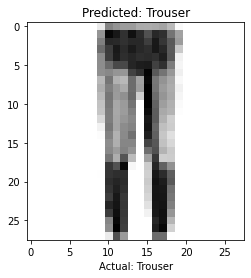

In [20]:
for i in range(4):
#     subplot(5,1,i+1)
    plt.grid(False)
    plt.imshow(test_img[i],cmap=plt.cm.binary)
    plt.xlabel("Actual: "+ class_names[test_labels[i]])
    plt.title("Predicted: "+ class_names[np.argmax(prediction[i])])

### Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [22]:
# Predicting single values (still an issue)
predictionx = model.predict([[train_img[1]]])
print(predictionx)
print(class_names[np.argmax(predictionx)])

[[8.4704500e-01 1.2394928e-06 4.6201718e-09 3.1523261e-04 2.8422335e-05
  5.9688445e-26 1.5261015e-01 0.0000000e+00 4.3319808e-08 2.9637827e-38]]
T-shirt/top
